In [33]:
import pandas as pd 
import numpy as np 
import matplotlib as plt
import seaborn as sns
from scipy import stats

In [34]:
coded_df = pd.read_csv('data\ml_ready_real_estate_data.csv')
coded_df

,bedroomCount,bathroomCount,habitableSurface,toiletCount,postCode,totalParkingCount,province_encoded,type_encoded,subtype_encoded,locality_encoded,...,hasSwimmingPool_encoded,hasFireplace_encoded,hasBasement_encoded,hasDressingRoom_encoded,hasDiningRoom_encoded,hasLift_encoded,hasHeatPump_encoded,hasPhotovoltaicPanels_encoded,hasLivingRoom_encoded,price
0,2.0,1.0,100.0,1.0,1040,1.0,1,1,1,951.0,...,0,0,1,0,0,1,0,0,1,399000.0
1,4.0,2.0,270.0,3.0,1040,0.0,1,2,2,951.0,...,0,0,1,0,1,0,0,0,1,895000.0
2,2.0,1.0,87.0,1.0,1040,0.0,1,1,1,951.0,...,0,0,0,0,0,1,0,0,1,465000.0
3,2.0,2.0,104.0,2.0,1040,0.0,1,1,1,551.0,...,0,0,0,0,0,1,0,0,1,590000.0
4,1.0,1.0,71.0,1.0,1040,0.0,1,1,3,951.0,...,0,0,0,0,0,0,0,0,0,289000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76098,4.0,2.0,242.0,2.0,9990,3.0,5,2,2,2106.0,...,1,0,0,0,0,0,0,0,0,649000.0
76099,3.0,1.0,94.0,1.0,1090,0.0,1,1,1,1652.0,...,0,0,1,0,0,1,0,0,1,279000.0
76100,3.0,1.0,113.0,1.0,1853,0.0,4,1,1,1243.0,...,0,0,1,0,0,1,0,0,1,299000.0
76101,3.0,2.0,111.0,2.0,8434,0.0,6,1,1,3633.0,...,0,0,0,0,0,1,0,0,1,325000.0


## Outliers

### Functions to identify and remove outliers

In [35]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [36]:
def identify_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] <= lower)], df[(df[col] >= upper)]

### Outliers price analysis

In [37]:
coded_df['price'].describe()

count    7.610300e+04
mean     4.351276e+05
std      4.127531e+05
min      5.000000e+04
25%      2.310000e+05
50%      3.295000e+05
75%      4.790000e+05
max      5.000000e+06
Name: price, dtype: float64

In [38]:
df_wout_price_out =  remove_outliers_iqr(coded_df, 'price')

In [39]:
df_wout_price_out['price'].describe()

count     70206.000000
mean     343889.518118
std      163700.495823
min       50000.000000
25%      225000.000000
50%      314000.000000
75%      430000.000000
max      850000.000000
Name: price, dtype: float64

#### Saving to csv

In [40]:
df_wout_price_out.to_csv("data\dataset_wout_price_outliers.csv", index=False, encoding='utf-8')

## Correlation Analysis

In [41]:
df_clean = df_wout_price_out

### Continuous Variables Analysis

In [42]:
df_continuous = df_clean.select_dtypes(include='float64')
#df_continuous = df_continuous.drop(columns=['id'])
df_continuous = df_continuous.drop(columns=['locality_encoded'])
df_continuous.columns

Index(['bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount',
       'totalParkingCount', 'epcScore_encoded', 'price'],
      dtype='object')

In [43]:
corr_matrix_cont = df_continuous.corr()
corr_matrix_cont

,bedroomCount,bathroomCount,habitableSurface,toiletCount,totalParkingCount,epcScore_encoded,price
bedroomCount,1.000000,0.428100,0.077439,0.449962,0.249473,-0.122555,0.405676
bathroomCount,0.428100,1.000000,0.040617,0.422654,0.087430,0.007430,0.357685
habitableSurface,0.077439,0.040617,1.000000,0.054369,0.037236,-0.005971,0.057637
toiletCount,0.449962,0.422654,0.054369,1.000000,0.145949,0.007832,0.380974
totalParkingCount,0.249473,0.087430,0.037236,0.145949,1.000000,-0.053044,0.232839
epcScore_encoded,-0.122555,0.007430,-0.005971,0.007832,-0.053044,1.000000,0.230839
price,0.405676,0.357685,0.057637,0.380974,0.232839,0.230839,1.000000


#### habitableSurface Analysis

In [44]:
df_clean['habitableSurface'].sort_values(ascending = False)


74585    185347.0
7288      65000.0
36368     22189.0
54533     13802.0
18856     12586.0
           ...   
61624        12.0
56454        12.0
14097        11.0
14110        10.0
13460         6.0
Name: habitableSurface, Length: 70206, dtype: float64

C:\Users\herms\AppData\Local\Temp\ipykernel_25732\2048458198.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_clean, x='habitableSurface', y='price',  palette='Set2' )


<Axes: xlabel='habitableSurface', ylabel='price'>

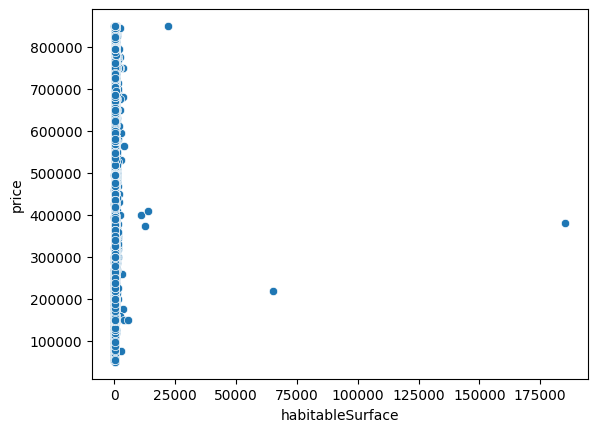

In [45]:
#plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='habitableSurface', y='price',  palette='Set2' )
#plt.title('Scatter Plot: Price vs Habitable Surface ')
#plt.xlabel('Habitable Surface')
#plt.ylabel('Price')
#plt.show()

In [59]:
# identifying properties with 10000 as habitable surface
df_surface_wout_outliers = df_clean[df_clean['habitableSurface'] <= 5000]
df_surface_wout_outliers


,bedroomCount,bathroomCount,habitableSurface,toiletCount,postCode,totalParkingCount,province_encoded,type_encoded,subtype_encoded,locality_encoded,...,hasSwimmingPool_encoded,hasFireplace_encoded,hasBasement_encoded,hasDressingRoom_encoded,hasDiningRoom_encoded,hasLift_encoded,hasHeatPump_encoded,hasPhotovoltaicPanels_encoded,hasLivingRoom_encoded,price
0,2.0,1.0,100.0,1.0,1040,1.0,1,1,1,951.0,...,0,0,1,0,0,1,0,0,1,399000.0
2,2.0,1.0,87.0,1.0,1040,0.0,1,1,1,951.0,...,0,0,0,0,0,1,0,0,1,465000.0
3,2.0,2.0,104.0,2.0,1040,0.0,1,1,1,551.0,...,0,0,0,0,0,1,0,0,1,590000.0
4,1.0,1.0,71.0,1.0,1040,0.0,1,1,3,951.0,...,0,0,0,0,0,0,0,0,0,289000.0
5,2.0,1.0,90.0,1.0,1040,0.0,1,1,1,951.0,...,0,0,1,0,0,1,0,0,1,375000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76098,4.0,2.0,242.0,2.0,9990,3.0,5,2,2,2106.0,...,1,0,0,0,0,0,0,0,0,649000.0
76099,3.0,1.0,94.0,1.0,1090,0.0,1,1,1,1652.0,...,0,0,1,0,0,1,0,0,1,279000.0
76100,3.0,1.0,113.0,1.0,1853,0.0,4,1,1,1243.0,...,0,0,1,0,0,1,0,0,1,299000.0
76101,3.0,2.0,111.0,2.0,8434,0.0,6,1,1,3633.0,...,0,0,0,0,0,1,0,0,1,325000.0


C:\Users\herms\AppData\Local\Temp\ipykernel_25732\907585732.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df_surface_wout_outliers, x='habitableSurface', y='price', palette='Set2' )


<Axes: xlabel='habitableSurface', ylabel='price'>

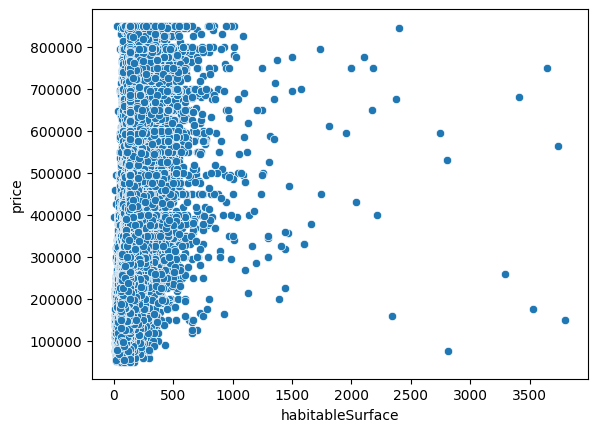

In [60]:
sns.scatterplot(data=df_surface_wout_outliers, x='habitableSurface', y='price', palette='Set2' )

In [61]:
df_surface_wout_outliers
df_continuous_surf = df_surface_wout_outliers.select_dtypes(include='float64')
#df_continuous_surf.drop(columns =['id'], inplace=True)
df_continuous_surf.drop(columns =['locality_encoded'], inplace=True)
df_continuous_surf.columns

Index(['bedroomCount', 'bathroomCount', 'habitableSurface', 'toiletCount',
       'totalParkingCount', 'epcScore_encoded', 'price'],
      dtype='object')

In [62]:
corr_matrix_s = df_continuous_surf.corr()
corr_matrix_s

,bedroomCount,bathroomCount,habitableSurface,toiletCount,totalParkingCount,epcScore_encoded,price
bedroomCount,1.000000,0.428131,0.535464,0.449983,0.249448,-0.122599,0.405679
bathroomCount,0.428131,1.000000,0.314188,0.422666,0.087439,0.007437,0.357726
habitableSurface,0.535464,0.314188,1.000000,0.386280,0.251382,-0.090612,0.420117
toiletCount,0.449983,0.422666,0.386280,1.000000,0.145964,0.007809,0.380995
totalParkingCount,0.249448,0.087439,0.251382,0.145964,1.000000,-0.053059,0.232875
epcScore_encoded,-0.122599,0.007437,-0.090612,0.007809,-0.053059,1.000000,0.230824
price,0.405679,0.357726,0.420117,0.380995,0.232875,0.230824,1.000000


In [63]:
df_new_clean = df_surface_wout_outliers
df_new_clean.describe()

,bedroomCount,bathroomCount,habitableSurface,toiletCount,postCode,totalParkingCount,province_encoded,type_encoded,subtype_encoded,locality_encoded,...,hasSwimmingPool_encoded,hasFireplace_encoded,hasBasement_encoded,hasDressingRoom_encoded,hasDiningRoom_encoded,hasLift_encoded,hasHeatPump_encoded,hasPhotovoltaicPanels_encoded,hasLivingRoom_encoded,price
count,70199.000000,70199.000000,70199.000000,70199.000000,70199.000000,70199.000000,70199.000000,70199.000000,70199.000000,70199.000000,...,70199.000000,70199.000000,70199.000000,70199.000000,70199.000000,70199.000000,70199.000000,70199.000000,70199.000000,70199.000000
mean,2.837775,1.233180,152.184319,1.720210,5267.034402,0.914016,5.623713,1.583926,3.240915,1809.242639,...,0.014017,0.034003,0.378524,0.030300,0.179305,0.244719,0.097380,0.105984,0.568000,343884.188735
std,1.219789,0.600484,101.614249,0.662299,3019.159201,1.507803,2.932373,0.492910,3.905191,1123.175047,...,0.117563,0.181239,0.485023,0.171412,0.383610,0.429923,0.296477,0.307820,0.495358,163694.800596
min,1.000000,1.000000,6.000000,1.000000,1000.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50000.000000
25%,2.000000,1.000000,95.000000,1.000000,2400.000000,0.000000,3.000000,1.000000,1.000000,789.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,225000.000000
50%,3.000000,1.000000,140.000000,2.000000,4821.000000,0.000000,5.000000,2.000000,2.000000,1773.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,314000.000000
75%,3.000000,1.000000,180.000000,2.000000,8430.000000,1.000000,7.000000,2.000000,2.000000,2759.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,430000.000000
max,10.000000,10.000000,3800.000000,5.000000,9992.000000,10.000000,11.000000,2.000000,24.000000,3819.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,850000.000000


### Boolean Variables Analysis

In [64]:
boolean_cols = df_new_clean.columns[df_new_clean.columns.str.startswith('has')]
print(boolean_cols)

Index(['hasAttic_encoded', 'hasGarden_encoded', 'hasAirConditioning_encoded',
       'hasArmoredDoor_encoded', 'hasVisiophone_encoded', 'hasTerrace_encoded',
       'hasOffice_encoded', 'hasSwimmingPool_encoded', 'hasFireplace_encoded',
       'hasBasement_encoded', 'hasDressingRoom_encoded',
       'hasDiningRoom_encoded', 'hasLift_encoded', 'hasHeatPump_encoded',
       'hasPhotovoltaicPanels_encoded', 'hasLivingRoom_encoded'],
      dtype='object')


In [65]:
point_biserial_corr = dict()
for col in boolean_cols:
    point_biserial_corr[col] = stats.pointbiserialr(df_new_clean[col], df_new_clean['price']).statistic

sorted_bool_correlation = dict(sorted(point_biserial_corr.items(), key=lambda x:x[1], reverse = True))
sorted_bool_correlation 

{'hasPhotovoltaicPanels_encoded': np.float64(0.18541501854676945),
 'hasOffice_encoded': np.float64(0.17749806406903582),
 'hasHeatPump_encoded': np.float64(0.1656899686015595),
 'hasFireplace_encoded': np.float64(0.1286711009740302),
 'hasSwimmingPool_encoded': np.float64(0.12531871606941383),
 'hasTerrace_encoded': np.float64(0.12109369669779865),
 'hasDressingRoom_encoded': np.float64(0.11872883647104025),
 'hasGarden_encoded': np.float64(0.10156281471826444),
 'hasArmoredDoor_encoded': np.float64(0.05739404311608514),
 'hasAirConditioning_encoded': np.float64(0.05713777914589892),
 'hasVisiophone_encoded': np.float64(0.04648790984160248),
 'hasDiningRoom_encoded': np.float64(0.04450223004194599),
 'hasAttic_encoded': np.float64(0.04386424557160784),
 'hasLivingRoom_encoded': np.float64(-0.0014982881292357163),
 'hasBasement_encoded': np.float64(-0.018742713285899843),
 'hasLift_encoded': np.float64(-0.0475347490720452)}

C:\Users\herms\AppData\Local\Temp\ipykernel_25732\777154667.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='correlation', ylabel='feature'>

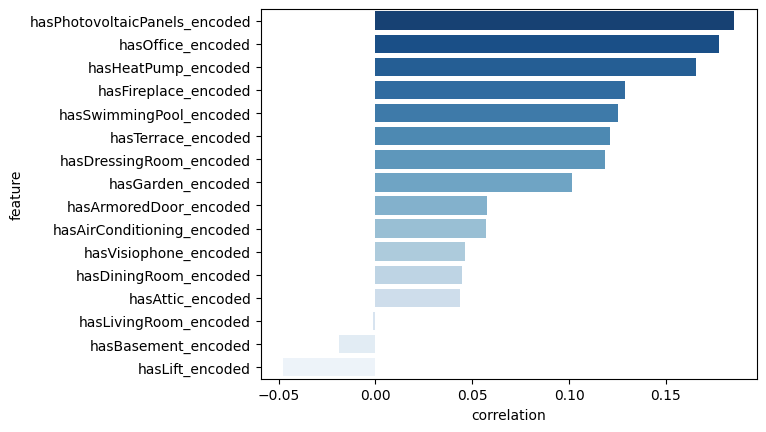

In [66]:
corr_series = pd.Series(point_biserial_corr).sort_values(ascending=False).head(16)

df_corr = corr_series.reset_index()
df_corr.columns = ['feature', 'correlation']
colors = sns.color_palette("Blues_r", n_colors=len(df_corr))

sns.barplot(
    data=df_corr,
    y='feature',
    x='correlation',
    palette=colors,
    orient='h'
)

# plt.title("Top 10 Features by Point-Biserial Correlation with Price", fontsize=14)
# plt.xlabel("Correlation coefficient")
# plt.ylabel("Boolean feature")
# plt.savefig('images/corr_with_price.png', pad_inches = 3)
# plt.show()

## Other Variables Analysis

In [54]:
df_new_clean.dtypes

bedroomCount                     float64
bathroomCount                    float64
habitableSurface                 float64
toiletCount                      float64
postCode                           int64
totalParkingCount                float64
province_encoded                   int64
type_encoded                       int64
subtype_encoded                    int64
locality_encoded                 float64
epcScore_encoded                 float64
hasAttic_encoded                   int64
hasGarden_encoded                  int64
hasAirConditioning_encoded         int64
hasArmoredDoor_encoded             int64
hasVisiophone_encoded              int64
hasTerrace_encoded                 int64
hasOffice_encoded                  int64
hasSwimmingPool_encoded            int64
hasFireplace_encoded               int64
hasBasement_encoded                int64
hasDressingRoom_encoded            int64
hasDiningRoom_encoded              int64
hasLift_encoded                    int64
hasHeatPump_enco

In [55]:
df_int_cols = df_clean.select_dtypes(include='int64').columns
encoded_categories = list(set(df_int_cols) - set(boolean_cols))
encoded_categories.append('locality_encoded')
encoded_categories

['postCode',
 'province_encoded',
 'subtype_encoded',
 'type_encoded',
 'locality_encoded']

In [56]:
for col in encoded_categories:
    df_new_clean[col]= df_new_clean[col].astype("category")


C:\Users\herms\AppData\Local\Temp\ipykernel_25732\4006750575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_clean[col]= df_new_clean[col].astype("category")
C:\Users\herms\AppData\Local\Temp\ipykernel_25732\4006750575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_clean[col]= df_new_clean[col].astype("category")
C:\Users\herms\AppData\Local\Temp\ipykernel_25732\4006750575.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [57]:
df_new_clean.dtypes

bedroomCount                      float64
bathroomCount                     float64
habitableSurface                  float64
toiletCount                       float64
postCode                         category
totalParkingCount                 float64
province_encoded                 category
type_encoded                     category
subtype_encoded                  category
locality_encoded                 category
epcScore_encoded                  float64
hasAttic_encoded                    int64
hasGarden_encoded                   int64
hasAirConditioning_encoded          int64
hasArmoredDoor_encoded              int64
hasVisiophone_encoded               int64
hasTerrace_encoded                  int64
hasOffice_encoded                   int64
hasSwimmingPool_encoded             int64
hasFireplace_encoded                int64
hasBasement_encoded                 int64
hasDressingRoom_encoded             int64
hasDiningRoom_encoded               int64
hasLift_encoded                   

In [58]:
df_new_clean.to_csv("data\dataset_wout_surf_encoded.csv", index=False, encoding='utf-8')